In [25]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import textstat
from collections import Counter
import re

In [26]:
# Load the ground truth
df = pd.read_csv("./data/train.csv")
print("Loaded train.csv with shape:", df.shape)

Loaded train.csv with shape: (95, 2)


In [15]:
def load_texts(row):
    folder = Path("./data/train") / f"article_{row['id']:04d}"
    with open(folder / "file_1.txt", "r", encoding="utf-8") as f1:
        text1 = f1.read()
    with open(folder / "file_2.txt", "r", encoding="utf-8") as f2:
        text2 = f2.read()
    return pd.Series([text1, text2])

In [16]:
df[["text_1", "text_2"]] = df.apply(load_texts, axis=1)
print("Loaded all text files!")

Loaded all text files!


In [17]:
# Compare lengths
df["len_1"] = df["text_1"].str.len()
df["len_2"] = df["text_2"].str.len()
df["len_diff"] = df["len_1"] - df["len_2"]

print("\nDifference in character length (text_1 - text_2):")
print(df["len_diff"].describe())

# Print summary stats
print("\nCharacter length statistics:")
print("Text 1 - mean:", df["len_1"].mean(), "min:", df["len_1"].min(), "max:", df["len_1"].max())
print("Text 2 - mean:", df["len_2"].mean(), "min:", df["len_2"].min(), "max:", df["len_2"].max())



Difference in character length (text_1 - text_2):
count       95.000000
mean      1029.642105
std       4988.749065
min      -8521.000000
25%       -276.500000
50%        142.000000
75%       1037.000000
max      38648.000000
Name: len_diff, dtype: float64

Character length statistics:
Text 1 - mean: 2949.315789473684 min: 0 max: 40316
Text 2 - mean: 1919.6736842105263 min: 0 max: 9561


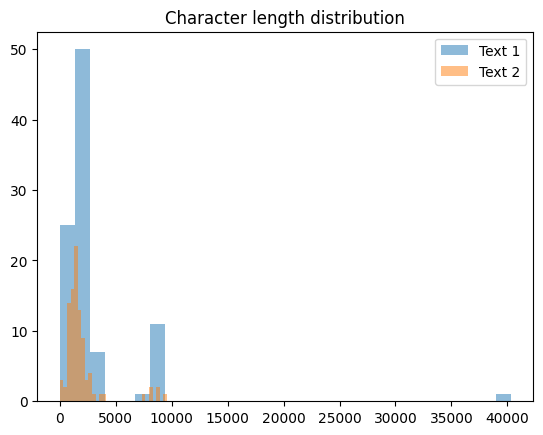

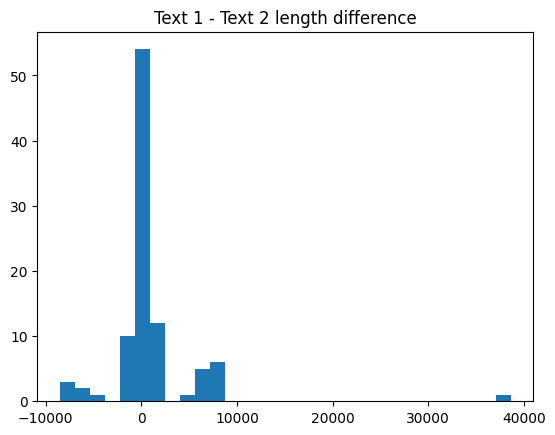

In [18]:
# Check distributions
plt.hist(df["len_1"], bins=30, alpha=0.5, label="Text 1")
plt.hist(df["len_2"], bins=30, alpha=0.5, label="Text 2")
plt.legend()
plt.title("Character length distribution")
plt.show()

plt.hist(df["len_diff"], bins=30)
plt.title("Text 1 - Text 2 length difference")
plt.show()

In [19]:
print("Empty text_1 count:", (df["len_1"] == 0).sum())
print("Empty text_2 count:", (df["len_2"] == 0).sum())

empty_text1_ids = df.loc[df["len_1"] == 0, "id"]
empty_text2_ids = df.loc[df["len_2"] == 0, "id"]

print("IDs with empty text_1:", empty_text1_ids.tolist())
print("IDs with empty text_2:", empty_text2_ids.tolist())

Empty text_1 count: 1
Empty text_2 count: 1
IDs with empty text_1: [14]
IDs with empty text_2: [10]


In [20]:
df["wordcount_1"] = df["text_1"].str.split().apply(len)
df["wordcount_2"] = df["text_2"].str.split().apply(len)

# Difference in length
df["wordcount_diff"] = df["wordcount_1"] - df["wordcount_2"]

print("\nDifference in word count (text_1 - text_2):")
print(df["wordcount_diff"].describe())

print("\nWord count statistics:")
print("Text 1 - mean:", df["wordcount_1"].mean(), "min:", df["wordcount_1"].min(), "max:", df["wordcount_1"].max())
print("Text 2 - mean:", df["wordcount_2"].mean(), "min:", df["wordcount_2"].min(), "max:", df["wordcount_2"].max())


Difference in word count (text_1 - text_2):
count      95.000000
mean      111.589474
std       503.832070
min      -791.000000
25%       -41.500000
50%        19.000000
75%       172.000000
max      3902.000000
Name: wordcount_diff, dtype: float64

Word count statistics:
Text 1 - mean: 377.88421052631577 min: 0 max: 4158
Text 2 - mean: 266.29473684210524 min: 0 max: 957


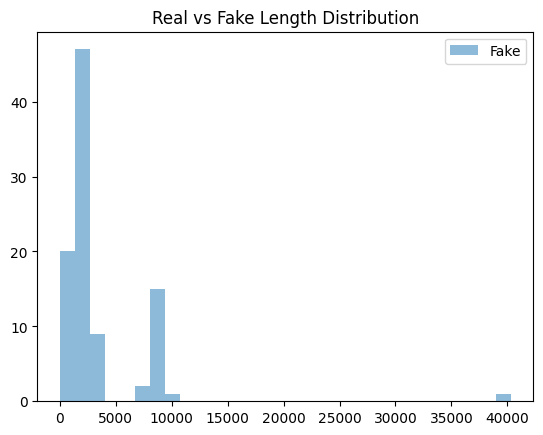

Average real length: 1447.3052631578948
Average fake length: 3421.684210526316


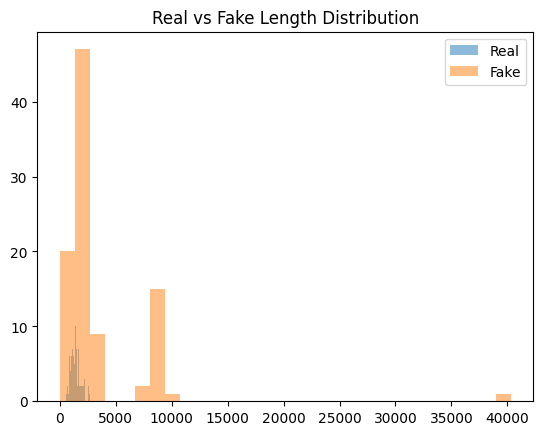

count      95.000000
mean     1447.305263
std       499.912228
min       552.000000
25%      1082.000000
50%      1373.000000
75%      1691.000000
max      2734.000000
Name: real_len, dtype: float64
count       95.000000
mean      3421.684211
std       4746.790428
min          0.000000
25%       1387.500000
50%       1854.000000
75%       3069.500000
max      40316.000000
Name: fake_len, dtype: float64


In [21]:
# Real vs Fake length comparison
df["real_len"] = df.apply(lambda row: row["len_1"] if row["real_text_id"] == 1 else row["len_2"], axis=1)
df["fake_len"] = df.apply(lambda row: row["len_2"] if row["real_text_id"] == 1 else row["len_1"], axis=1)

# plt.hist(df["real_len"], bins=30, alpha=0.5, label="Real")
plt.hist(df["fake_len"], bins=30, alpha=0.5, label="Fake")
plt.legend()
plt.title("Real vs Fake Length Distribution")
plt.show()

print("Average real length:", df["real_len"].mean())
print("Average fake length:", df["fake_len"].mean())

plt.hist(df["real_len"], bins=30, alpha=0.5, label="Real")
plt.hist(df["fake_len"], bins=30, alpha=0.5, label="Fake")
plt.legend()
plt.title("Real vs Fake Length Distribution")
plt.show()

print(df["real_len"].describe())
print(df["fake_len"].describe())

In [22]:
df["readability_1"] = df["text_1"].apply(textstat.flesch_reading_ease)
df["readability_2"] = df["text_2"].apply(textstat.flesch_reading_ease)

df["real_readability"] = df.apply(lambda row: row["readability_1"] if row["real_text_id"] == 1 else row["readability_2"], axis=1)
df["fake_readability"] = df.apply(lambda row: row["readability_2"] if row["real_text_id"] == 1 else row["readability_1"], axis=1)

print("Average Real Readability:", df["real_readability"].mean())
print("Average Fake Readability:", df["fake_readability"].mean())

print("Real Text Readability Stats:")
print(df["real_readability"].describe())

print("\nFake Text Readability Stats:")
print(df["fake_readability"].describe())

Average Real Readability: 25.41070049781437
Average Fake Readability: 26.568827794313403
Real Text Readability Stats:
count    95.000000
mean     25.410700
std      15.469199
min     -17.445969
25%      15.632642
50%      24.790070
75%      37.379415
max      56.119318
Name: real_readability, dtype: float64

Fake Text Readability Stats:
count    95.000000
mean     26.568828
std      19.830576
min     -66.226250
25%      11.160774
50%      28.301375
75%      39.875641
max      68.431667
Name: fake_readability, dtype: float64


In [23]:
def type_token_ratio(text):
    tokens = text.split()
    return len(set(tokens)) / len(tokens) if tokens else 0

df["ttr_1"] = df["text_1"].apply(type_token_ratio)
df["ttr_2"] = df["text_2"].apply(type_token_ratio)

df["real_ttr"] = df.apply(lambda row: row["ttr_1"] if row["real_text_id"] == 1 else row["ttr_2"], axis=1)
df["fake_ttr"] = df.apply(lambda row: row["ttr_2"] if row["real_text_id"] == 1 else row["ttr_1"], axis=1)

print("Average TTR (real):", df["real_ttr"].mean())
print("Average TTR (fake):", df["fake_ttr"].mean())

print(df["real_ttr"].describe())
print(df["fake_ttr"].describe())

Average TTR (real): 0.7274962148342985
Average TTR (fake): 0.7380854379389327
count    95.000000
mean      0.727496
std       0.075429
min       0.566474
25%       0.676682
50%       0.730594
75%       0.768159
max       0.923077
Name: real_ttr, dtype: float64
count    95.000000
mean      0.738085
std       0.176597
min       0.000000
25%       0.666667
50%       0.729358
75%       0.814280
max       0.993342
Name: fake_ttr, dtype: float64


In [24]:
def tokenize(text):
    # Basic word tokenizer (ignore punctuation, case-insensitive)
    return re.findall(r"\b\w+\b", text.lower())

# Collect all real and fake texts
real_texts = df.apply(lambda row: row["text_1"] if row["real_text_id"] == 1 else row["text_2"], axis=1)
fake_texts = df.apply(lambda row: row["text_2"] if row["real_text_id"] == 1 else row["text_1"], axis=1)

# Tokenize and count
real_tokens = [token for text in real_texts for token in tokenize(text)]
fake_tokens = [token for text in fake_texts for token in tokenize(text)]

real_counts = Counter(real_tokens)
fake_counts = Counter(fake_tokens)

# Display top 20 most common words
print("\nTop 20 Most Common Words in Real Texts:")
print(real_counts.most_common(20))

print("\nTop 20 Most Common Words in Fake Texts:")
print(fake_counts.most_common(20))


Top 20 Most Common Words in Real Texts:
[('the', 1116), ('of', 507), ('and', 507), ('to', 406), ('a', 369), ('in', 335), ('for', 247), ('this', 211), ('with', 205), ('on', 169), ('is', 160), ('from', 147), ('by', 124), ('are', 124), ('that', 118), ('at', 116), ('stars', 114), ('as', 108), ('s', 107), ('these', 100)]

Top 20 Most Common Words in Fake Texts:
[('the', 1219), ('of', 594), ('and', 500), ('a', 492), ('to', 459), ('in', 341), ('this', 235), ('for', 229), ('s', 217), ('we', 197), ('with', 190), ('is', 175), ('on', 161), ('that', 156), ('as', 144), ('from', 144), ('at', 134), ('it', 134), ('these', 126), ('by', 122)]
